# Name: Priyanka Bhatta

# I'd:2060036

# Breast Cancer Analysis and Prediction

# Introduction
In this notebook, I explore the Breast Cancer dataset and develop a Logistic Regression model to try classifying suspected cells to Benign or Malignant.

#  About Data

Attribute Information:
- id
- diagnosis: M = malignant, B = benign


Ten real-valued features are computed for each cell nucleus:

1. radius: distances from center to points on the perimeter
2. texture: standard deviation of gray-scale values
3. perimeter
4. area
5. smoothness: local variation in radius lengths
6. compactness: perimeter^2 / area - 1.0
7. concavity: severity of concave portions of the contour
8. concave points: number of concave portions of the contour
9. symmetry
10. fractal dimension: "coastline approximation" - 1

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

# 1. Load libraries and read the data

# 1.1. Load libraries

In [1]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore') #ignore warning messages 


# 1.2. Read the data

In [2]:
data = pd.read_csv('data.csv') 
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 1.3. Clean and prepare data

In [3]:
# Dropping useless variables
data.drop('id',axis=1,inplace=True)

# Reassigning target
data.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [4]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
# size of the dataframe
len(data)

569

In [6]:
data.diagnosis.unique()

array([1, 0], dtype=int64)

# 2.Exploratory Data Analysis (EDA)

# 2.1. Head and describe

In [7]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# 2.2. Target distribution (number and %)

In [9]:
# 2 datasets
M = data[(data['diagnosis'] != 0)]
B = data[(data['diagnosis'] == 0)]

In [10]:
#------------COUNT-----------------------
trace = go.Bar(x = (len(M), len(B)), y = ['malignant', 'benign'], orientation = 'h', opacity = 0.9, marker=dict(
        color=[ 'pink', 'red'],
        line=dict(color='#000000',width=1.0)))

layout = dict(title =  'Count of diagnosis variable')
                    
figure = dict(data = [trace], layout=layout)
py.iplot(figure)

In [11]:
#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['benign','malignant'], values = data['diagnosis'].value_counts(), 
               textfont=dict(size=14), opacity = 0.7,
               marker=dict(colors=['red', 'pink'], 
                           line=dict(color='#000000', width=1.0)))


layout = dict(title =  'Distribution of diagnosis variable')
           
figure = dict(data = [trace], layout=layout)
py.iplot(figure)

# 2.3. Features distribution (hue = diagnosis)

In [12]:
def plot_distribution(data_select, size_bin) :  
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['malignant', 'benign']
    colors = ['brown', 'red']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

In [13]:
#plot distribution 'mean'
plot_distribution('radius_mean', .5)
plot_distribution('texture_mean', .5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)

In [14]:
#plot distribution 'se'
plot_distribution('radius_se', .1)
plot_distribution('texture_se', .1)
plot_distribution('perimeter_se', .5)
plot_distribution('area_se', 5)

In [15]:
#plot distribution 'worst'
plot_distribution('radius_worst', .5)
plot_distribution('texture_worst', .5)
plot_distribution('perimeter_worst', 5)
plot_distribution('area_worst', 10)

# 2.4. Correlation matrix

In [16]:
#correlation
correlation = data.corr()

#tick labels
matrix_columns = correlation.columns.tolist()

#convert to array
correlation_array  = np.array(correlation)

In [17]:
#Plotting
trace = go.Heatmap(z = correlation_array,
                   x = matrix_columns,
                   y = matrix_columns,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
figure = go.Figure(data = [trace],layout = layout)
py.iplot(figure)

Let's check the correlation between few features by pair

# 2.5. Positive correlated features

In [18]:
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = M[feat1],
        y = M[feat2],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = 'red',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = B[feat1],
        y = B[feat2],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = 'pink',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    figure = dict(data = plots, layout=layout)
    py.iplot(figure)

In [19]:
plot_feat1_feat2('perimeter_mean','radius_worst')
plot_feat1_feat2('area_mean','radius_worst')
plot_feat1_feat2('texture_mean','texture_worst')
plot_feat1_feat2('area_worst','radius_worst')

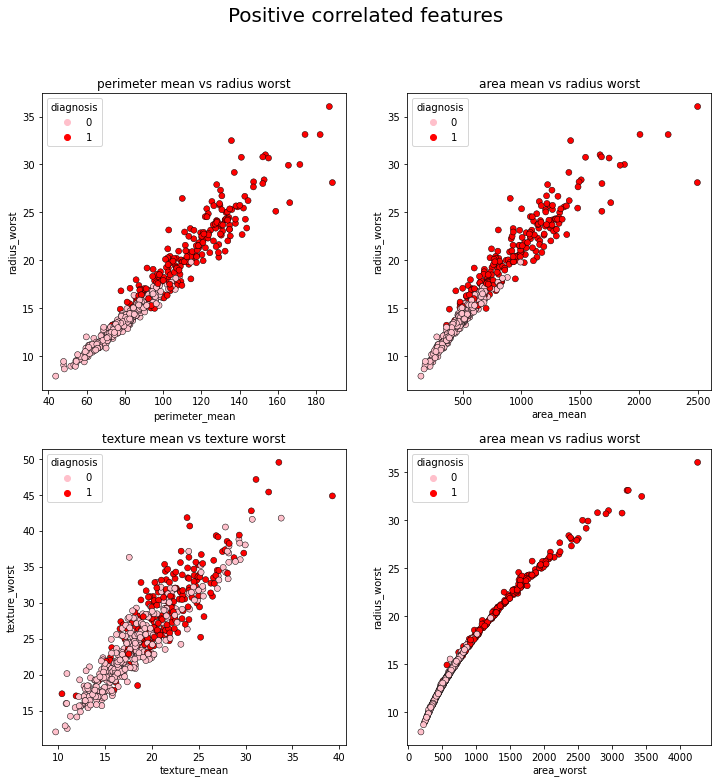

In [20]:
#seaborn version : 

palette ={0 : 'pink', 1 : 'red'}
edgecolor = 'black'

# Plot +
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['perimeter_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.title('perimeter mean vs radius worst')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['area_mean'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)

plt.title('area mean vs radius worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['texture_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)

plt.title('texture mean vs texture worst')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['area_worst'], y = data['radius_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)

plt.title('area mean vs radius worst')

fig.suptitle('Positive correlated features', fontsize = 20)
plt.savefig('1')
plt.show()

# 2.6. Uncorrelated features

In [21]:
plot_feat1_feat2('smoothness_mean','texture_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_worst')
plot_feat1_feat2('texture_mean','symmetry_mean')
plot_feat1_feat2('texture_mean','symmetry_se')

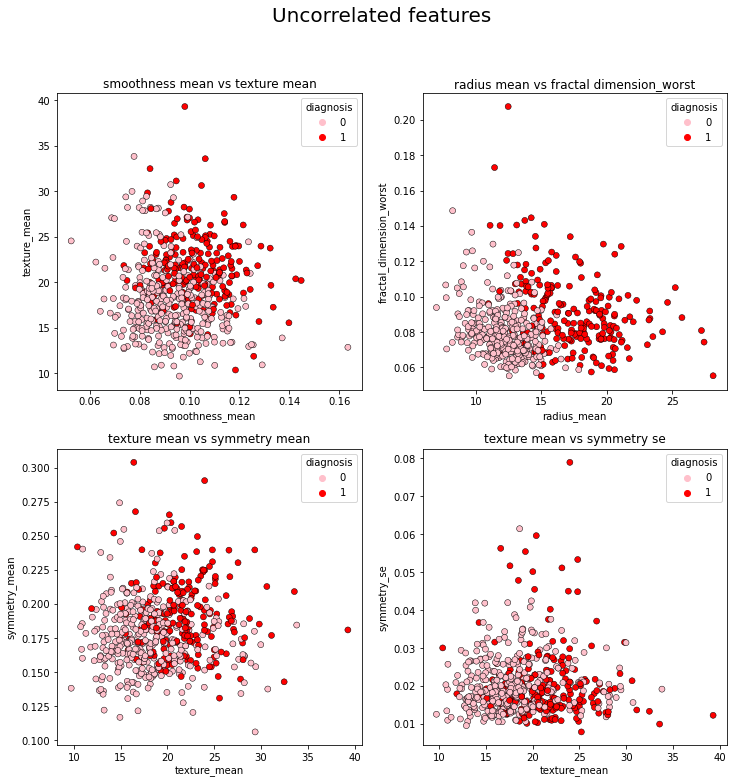

In [22]:
# seaborn version : 
fig = plt.figure(figsize=(12,12))

plt.subplot(221)
ax1 = sns.scatterplot(x = data['smoothness_mean'], y = data['texture_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)

plt.title('smoothness mean vs texture mean')
plt.subplot(222)
ax2 = sns.scatterplot(x = data['radius_mean'], y = data['fractal_dimension_worst'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)

plt.title('radius mean vs fractal dimension_worst')
plt.subplot(223)
ax3 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_mean'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)

plt.title('texture mean vs symmetry mean')
plt.subplot(224)
ax4 = sns.scatterplot(x = data['texture_mean'], y = data['symmetry_se'], hue = "diagnosis",
                    data = data, palette =palette, edgecolor=edgecolor)

plt.title('texture mean vs symmetry se')

fig.suptitle('Uncorrelated features', fontsize = 20)
plt.savefig('2')
plt.show()


# 2.7. Negative correlated features

In [23]:
plot_feat1_feat2('area_mean','fractal_dimension_mean')
plot_feat1_feat2('radius_mean','fractal_dimension_mean')
plot_feat1_feat2('area_mean','smoothness_se')
plot_feat1_feat2('smoothness_se','perimeter_mean')

# 3. Prepare dataset

# 3.1. Define (X, y)

- y = diagnosis (target)
- X = features (radius_mean, area_se, ....)

In [24]:
X = data
y = data['diagnosis']

# 3.2. Standard scaler (X)

Why do I need to standardize my data ? For example, a variable that ranges between 0 and 100 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization in effect gives the variable with the larger range a bigger weight in the analysis

In [25]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3.3. Train test split

In [26]:
# Train_test split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12, random_state = random_state)

# 4. Predictive model : Logistic Regression

In [27]:
from sklearn import linear_model 

mymodel = linear_model.LogisticRegression(max_iter=130) 
mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=130)

In [28]:
y_test = mymodel.predict(X_test)
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0], dtype=int64)

The above outputs are the prediction made by the model for the test dataset.

In [29]:
y_pred = mymodel.score(X_test, y_test)
y_pred

1.0

Hence, this shows that my model is 100% accurate.

In [30]:
y_score = mymodel.decision_function(X_test)
y_score

array([-4.32652625,  8.1898916 ,  5.59942588, -6.43282144, -7.49296506,
       13.9536279 , 12.30899397,  4.67445408, -3.4921599 , -6.66770967,
       -4.80167806,  5.14774566, -5.60852776,  4.06626381, -6.52533402,
        7.26210614, -6.19263354, -8.24497897, -9.82386858,  9.41335134,
        2.11061565, -5.37654907, 11.80239209, -7.92113758, -6.41013053,
       -6.3611536 , -6.43470782, -5.61911757, -5.83566653,  8.64900953,
       -6.49175587, -7.47166393, -6.00966337, -5.81459581, -7.34954153,
       -6.28005534,  4.04238208, -6.18318535,  7.17529737, -4.502283  ,
       -7.30656763,  6.32514172, -5.88331202, -6.60311906, -4.74980749,
       -5.10384518, -6.82743465, -6.79269619, -5.03049932, -6.53079684,
        6.99701351, 10.62000276, -3.85306199, -4.43298417, -7.73888476,
       -5.70683598, -7.33903426, 15.07004345,  3.88590613, -7.45989579,
       -5.59394093,  9.75050111, 12.04011225, -4.99079743, -6.80147298,
       -4.44501388,  7.99330069, 12.74965081, -6.56291004])

In [31]:
#I'm going to store predict output in variable called predicted_output
predicted_output = mymodel.predict(X_test)
predicted_output

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0], dtype=int64)

It is an array that contains output predicted by the model.

# 5. Confusion matrix

The confusion matrix, also known as the error matrix, allows visualization of the performance of an algorithm :

- true positive (TP) : Malignant tumour correctly identified as malignant
- true negative (TN) : Benign tumour correctly identified as benign
- false positive (FP) : Benign tumour incorrectly identified as malignant
- false negative (FN) : Malignant tumour incorrectly identified as benign

In [32]:
cm = confusion_matrix(y_test, predicted_output)
cm 

array([[46,  0],
       [ 0, 23]], dtype=int64)

From the answer, we can see that there is 2 possible outcome that our model can predict.
Hence, we've got 2x2 array.

Text(24.0, 0.5, 'Truth or Actual Value')

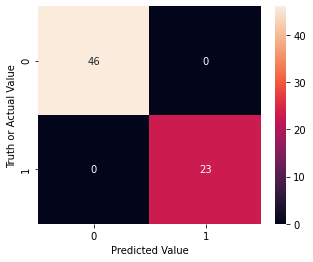

In [33]:
plt.figure(figsize = (5,4))  
sn.heatmap(cm, annot=True)   

plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

# 6. ROC curve

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

In [34]:
# ROC curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

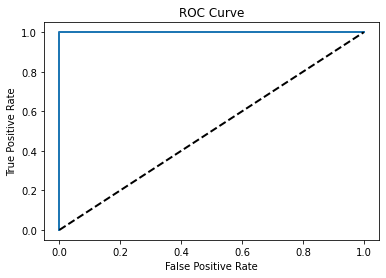

In [35]:
# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Summary

Our model have accurately labeled 100% of the test data.This is just the beginning however. We could try to increase/decrease the accuracy even higher by using a different algorithm other than the logistic regression, or try our model with different set of variables. There are defintely many more things that could be done to modify our model, but I will conclude this report here for now.